# Model 1 - LolaRa
(Ra is the ancient Egyptian god of the sun and creation. He is considered one of the most important deities. A model named LolaRa might imply illumination, enlightenment, or creation)

**Data Preparation and Cleaning:**
Initially, we focused on the preprocessing steps, which involved cleaning and exploring the dataset comprehensively. During this phase:
- We thoroughly analyzed the data to understand its structure and identify potential issues, such as missing values and outliers.
- We experimented with various imputation techniques to handle missing data. Ultimately, we decided to drop all rows with null values to ensure the integrity and reliability of our dataset.

**Feature Selection:**
To enhance our model's performance, we implemented a feature selection process:
- We employed a voting method, aggregating the results from multiple feature selection techniques to identify the most relevant features that effectively explain our multiclass target.

**Model Training:**
For the modeling phase, we chose the LightGBM algorithm due to its efficiency and robust performance with structured data:
- We trained a nested multiclass LightGBM model, utilizing a cross-validation strategy to optimize hyperparameters and prevent overfitting.
- The model demonstrated acceptable performance metrics when evaluated on new, unseen data, indicating its capability to generalize well.

**Conclusion:**
The combination of rigorous data cleaning, strategic feature selection, and the use of a sophisticated LightGBM model resulted in a robust machine learning solution for our multiclass classification task.

In [ ]:
!pip install ta
!pip install catboost
!pip install openml
!pip install fancyimpute
import sys
import pandas as pd
from matplotlib import pyplot as plt
from itertools import combinations
import seaborn as sns
import calendar
import torch
import numpy as np
#from google.colab import data_table
from sklearn.cluster import SpectralClustering
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectPercentile, f_classif
from scipy import stats
import ta
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import RidgeClassifier
from scipy.stats import mstats
from sklearn.metrics import make_scorer
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
import statsmodels.stats.diagnostic as smd
from sklearn.feature_selection import SelectKBest, f_classif, chi2, SelectFromModel, VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression, VarianceThreshold
from sklearn.feature_selection import RFE
from sklearn.ensemble import VotingRegressor
from sklearn.feature_selection import SelectKBest, f_regression,SelectPercentile
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, RandomizedSearchCV
from sklearn.metrics import f1_score, make_scorer, roc_auc_score, log_loss
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
import pickle
from sklearn.feature_selection import RFE
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29411 sha256=ffcdd0660f791f6f7964416237832b6493d2cd35e497f9a2e569fce6daec3298
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 3.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.1 MB/s eta 0:00:00
  Created wheel for openml: filename=openml-0.14.2-py3-none-any.whl size=158699 sha256=f5fef5dada6af313817bd3f24c07131159bc6cde0f7642ca642cf7e0691

In [ ]:
#python version
print(sys.version)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


# Load data

In [ ]:
df_5_pips = pd.read_csv('/content/drive/MyDrive/Odysmerc/Data5pips/Minute5_pips_peaks.csv',delimiter=";")
print(df_5_pips.shape)

(89346, 55)


## Drop NaN

In [ ]:
df_5_pips.head(2)

,Id,DateTime,Classification,Type,Size,Tick1Mvnt,Tick2Mvnt,Tick3Mvnt,Tick4Mvnt,Tick5Mvnt,Tick6Mvnt,Tick7Mvnt,Tick8Mvnt,Tick9Mvnt,Tick10Mvnt,Tick11Mvnt,Tick12Mvnt,Tick13Mvnt,Tick14Mvnt,Tick15Mvnt,Tick16Mvnt,Tick17Mvnt,Tick18Mvnt,Tick19Mvnt,Tick20Mvnt,Tick21Mvnt,Tick22Mvnt,Tick23Mvnt,Tick24Mvnt,Tick25Mvnt,Tick26Mvnt,Tick27Mvnt,Tick28Mvnt,Tick29Mvnt,Tick30Mvnt,Tick31Mvnt,Tick32Mvnt,Tick33Mvnt,Tick34Mvnt,Tick35Mvnt,Tick36Mvnt,Tick37Mvnt,Tick38Mvnt,Tick39Mvnt,Tick40Mvnt,Tick41Mvnt,Tick42Mvnt,Tick43Mvnt,Tick44Mvnt,Tick45Mvnt,Tick46Mvnt,Tick47Mvnt,Tick48Mvnt,Tick49Mvnt,Tick50Mvnt
0,1,2016.01.04 01:03:00,VS,SLS,60.0,-10.0,0.0,-10.0,-20.0,-30.0,-40.0,-50.0,-40.0,-50.0,-60.0,-50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2016.01.04 01:04:00,SS,SLM,50.0,-10.0,-20.0,-10.0,-20.0,-10.0,-20.0,-10.0,-20.0,-30.0,-40.0,-50.0,-40.0,-50.0,-40.0,-50.0,-60.0,-50.0,-60.0,-50.0,-40.0,-50.0,-40.0,-50.0,-40.0,-50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# prompt: drop NaN values
df_5_pips = df_5_pips.dropna()
print(df_5_pips.shape)

(76022, 55)


In [ ]:
#drop WS classification
#df_5_pips = df_5_pips[df_5_pips['Classification'] != 'WS']
#print(df_5_pips.shape)

(75593, 55)


In [ ]:
#drop VW classification
#df_5_pips = df_5_pips[df_5_pips['Classification'] != 'NS']
#print(df_5_pips.shape)

(66363, 55)


In [ ]:
#drop another no informative featuere
df_5_pips.drop(columns=['Id','Size','Type'],inplace=True)

In [ ]:
#convert Datetime column to datetime format
df_5_pips['datetime'] = pd.to_datetime(df_5_pips['DateTime'])

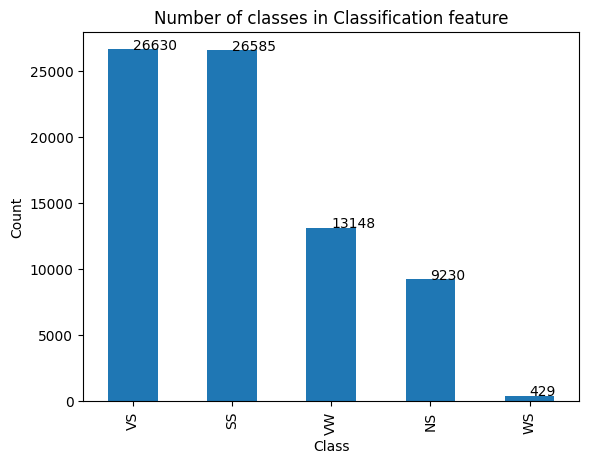

In [ ]:
# prompt: count and plot number of classes in Classification feature inside df_5_pips dataframe and show numbers in the bars

import matplotlib.pyplot as plt
df_5_pips['Classification'].value_counts().plot(kind='bar')
plt.title('Number of classes in Classification feature')
plt.xlabel('Class')
plt.ylabel('Count')
for i in plt.gca().patches:
    plt.gca().text(i.get_x() + i.get_width() / 2, i.get_height(),
                   str(i.get_height()), fontsize=10, color='black')

plt.show()

In [ ]:
df_5_pips_nan = df_5_pips.copy()

In [ ]:
# mapping Classification column to a numeric values and save in a new column name class
df_5_pips_nan['target'] = df_5_pips_nan['Classification'].map({'VS': 0, 'SS': 1, 'VW': 2, 'NS': 1, 'WS':2}).copy()
print(df_5_pips_nan.shape)

(76022, 54)


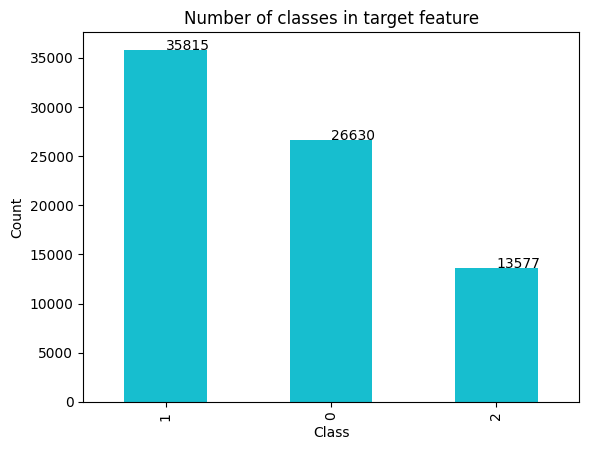

In [ ]:
df_5_pips_nan['target'].value_counts().plot(kind='bar',color=sns.color_palette()[9])
plt.title('Number of classes in target feature')
plt.xlabel('Class')
plt.ylabel('Count')
for i in plt.gca().patches:
    plt.gca().text(i.get_x() + i.get_width() / 2, i.get_height(),
                   str(i.get_height()), fontsize=10, color='black')

plt.show()

In [ ]:
columns_to_transform = ['Tick1Mvnt',	'Tick2Mvnt',	'Tick3Mvnt']

In [ ]:
#features
to_new_feat = df_5_pips_nan[columns_to_transform]
print(to_new_feat.shape)

(76022, 3)


In [ ]:
to_new_feat.head(2)

,Tick1Mvnt,Tick2Mvnt,Tick3Mvnt
70,-10.0,-20.0,-10.0
73,10.0,0.0,10.0


In [ ]:
#add datetime & target columns
to_new_feat['datetime'] = df_5_pips_nan['datetime'].copy()
to_new_feat['target'] = df_5_pips_nan['target'].copy()
print(to_new_feat.shape)

(76022, 5)


<ipython-input-441-55225d0c1702>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_new_feat['datetime'] = df_5_pips_nan['datetime'].copy()
<ipython-input-441-55225d0c1702>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_new_feat['target'] = df_5_pips_nan['target'].copy()


In [ ]:
to_new_feat.head(2)

,Tick1Mvnt,Tick2Mvnt,Tick3Mvnt,datetime,target
70,-10.0,-20.0,-10.0,2016-01-04 15:32:00,1
73,10.0,0.0,10.0,2016-01-04 15:35:00,1


In [ ]:
import pandas as pd
import numpy as np

def engineer_features(data):
    # Ensure the data is a DataFrame
    if not isinstance(data, pd.DataFrame):
        raise ValueError("Input data must be a pandas DataFrame.")

    # Check if the necessary columns are present
    required_columns = ['Tick1Mvnt', 'Tick2Mvnt', 'Tick3Mvnt', 'datetime']
    if not all(col in data.columns for col in required_columns):
        raise ValueError(f"DataFrame must contain the following columns: {required_columns}")

    features = pd.DataFrame()

    # Absolute movements
    features['AbsTick1Mvnt'] = data['Tick1Mvnt'].abs()
    features['AbsTick2Mvnt'] = data['Tick2Mvnt'].abs()
    features['AbsTick3Mvnt'] = data['Tick3Mvnt'].abs()

    # Interaction terms
    features['Tick1_2_Interaction'] = data['Tick1Mvnt'] * data['Tick2Mvnt']
    features['Tick2_3_Interaction'] = data['Tick2Mvnt'] * data['Tick3Mvnt']
    features['Tick1_3_Interaction'] = data['Tick1Mvnt'] * data['Tick3Mvnt']

    # Differences and ratios
    features['Tick1_Tick2_Diff'] = data['Tick1Mvnt'] - data['Tick2Mvnt']
    features['Tick2_Tick3_Diff'] = data['Tick2Mvnt'] - data['Tick3Mvnt']
    features['Tick1_Tick3_Diff'] = data['Tick1Mvnt'] - data['Tick3Mvnt']

    features['Tick1_Tick2_Ratio'] = data['Tick1Mvnt'] / (data['Tick2Mvnt'] + 1e-6)  # adding a small value to avoid division by zero
    features['Tick2_Tick3_Ratio'] = data['Tick2Mvnt'] / (data['Tick3Mvnt'] + 1e-6)
    features['Tick1_Tick3_Ratio'] = data['Tick1Mvnt'] / (data['Tick3Mvnt'] + 1e-6)

    # Logarithmic transformations
    features['LogAbsTick1Mvnt'] = np.log(features['AbsTick1Mvnt'] + 1e-6)  # log transformation
    features['LogAbsTick2Mvnt'] = np.log(features['AbsTick2Mvnt'] + 1e-6)
    features['LogAbsTick3Mvnt'] = np.log(features['AbsTick3Mvnt'] + 1e-6)

    # Square and Square root transformations
    features['SqrTick1Mvnt'] = data['Tick1Mvnt'] ** 2
    features['SqrTick2Mvnt'] = data['Tick2Mvnt'] ** 2
    features['SqrTick3Mvnt'] = data['Tick3Mvnt'] ** 2

    features['SqrtAbsTick1Mvnt'] = np.sqrt(features['AbsTick1Mvnt'])
    features['SqrtAbsTick2Mvnt'] = np.sqrt(features['AbsTick2Mvnt'])
    features['SqrtAbsTick3Mvnt'] = np.sqrt(features['AbsTick3Mvnt'])

    # Indicator variables for movements
    features['IsTick1Positive'] = (data['Tick1Mvnt'] > 0).astype(int)
    features['IsTick2Positive'] = (data['Tick2Mvnt'] > 0).astype(int)
    features['IsTick3Positive'] = (data['Tick3Mvnt'] > 0).astype(int)

    features['IsTick1Negative'] = (data['Tick1Mvnt'] < 0).astype(int)
    features['IsTick2Negative'] = (data['Tick2Mvnt'] < 0).astype(int)
    features['IsTick3Negative'] = (data['Tick3Mvnt'] < 0).astype(int)

    # Composite features
    features['Tick1_Tick2_LogRatio'] = features['LogAbsTick1Mvnt'] / (features['LogAbsTick2Mvnt'] + 1e-6)
    features['Tick2_Tick3_LogRatio'] = features['LogAbsTick2Mvnt'] / (features['LogAbsTick3Mvnt'] + 1e-6)
    features['Tick1_Tick3_LogRatio'] = features['LogAbsTick1Mvnt'] / (features['LogAbsTick3Mvnt'] + 1e-6)

    # Time-related features
    data['datetime'] = pd.to_datetime(data['datetime'])
    features['Hour'] = data['datetime'].dt.hour
    features['DayOfWeek'] = data['datetime'].dt.dayofweek
    features['IsWeekend'] = data['datetime'].dt.dayofweek.isin([5, 6]).astype(int)  # 5 for Saturday, 6 for Sunday
    features['DayOfMonth'] = data['datetime'].dt.day
    features['IsEndOfMonth'] = (data['datetime'] + pd.offsets.MonthEnd(0)).dt.day == data['datetime'].dt.day
    features['Quarter'] = data['datetime'].dt.quarter
    features['IsEndOfQuarter'] = (data['datetime'] + pd.offsets.QuarterEnd(0)).dt.day == data['datetime'].dt.day
    features['Month'] = data['datetime'].dt.month

    # Return the engineered features
    return features


In [ ]:
features_df = engineer_features(to_new_feat)
print(features_df.shape)

(76022, 38)


<ipython-input-443-1cac8f38f199>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['datetime'] = pd.to_datetime(data['datetime'])


In [ ]:
#add datetime & target columns
features_df['datetime'] = df_5_pips_nan['datetime']
features_df['target'] = df_5_pips_nan['target']
#features_df['Tick1Mvnt'] = df_5_pips_nan['Tick1Mvnt']
#features_df['Tick2Mvnt'] = df_5_pips_nan['Tick2Mvnt']
print(features_df.shape)

(76022, 40)


In [ ]:
features_df.columns.to_list()

['AbsTick1Mvnt',
 'AbsTick2Mvnt',
 'AbsTick3Mvnt',
 'Tick1_2_Interaction',
 'Tick2_3_Interaction',
 'Tick1_3_Interaction',
 'Tick1_Tick2_Diff',
 'Tick2_Tick3_Diff',
 'Tick1_Tick3_Diff',
 'Tick1_Tick2_Ratio',
 'Tick2_Tick3_Ratio',
 'Tick1_Tick3_Ratio',
 'LogAbsTick1Mvnt',
 'LogAbsTick2Mvnt',
 'LogAbsTick3Mvnt',
 'SqrTick1Mvnt',
 'SqrTick2Mvnt',
 'SqrTick3Mvnt',
 'SqrtAbsTick1Mvnt',
 'SqrtAbsTick2Mvnt',
 'SqrtAbsTick3Mvnt',
 'IsTick1Positive',
 'IsTick2Positive',
 'IsTick3Positive',
 'IsTick1Negative',
 'IsTick2Negative',
 'IsTick3Negative',
 'Tick1_Tick2_LogRatio',
 'Tick2_Tick3_LogRatio',
 'Tick1_Tick3_LogRatio',
 'Hour',
 'DayOfWeek',
 'IsWeekend',
 'DayOfMonth',
 'IsEndOfMonth',
 'Quarter',
 'IsEndOfQuarter',
 'Month',
 'datetime',
 'target']

In [ ]:
columns_to_model = [
'Hour',
'DayOfWeek',
'Quarter',
'Month',
'DayOfMonth',
'SqrtAbsTick3Mvnt',
'Tick1_Tick3_LogRatio'
]

# Lightgbm Model

In [ ]:
#features_df_sample = features_df.sample(frac=0.1, random_state=42)
#print(features_df_sample.shape)

In [ ]:
#create a new dataframe with columns_to_model and add 'DateTime' and 'class' features
df_to_model = features_df.copy()
print(df_to_model.shape)

(76022, 40)


# Split Data

In [ ]:
train_dataset_ = df_to_model[(df_to_model['datetime'] >= '2016-01-02 07:25:00') & (df_to_model['datetime'] <= '2022-12-30 23:59:00')]
test_dataset_ = df_to_model[(df_to_model['datetime'] > '2022-12-30 23:59:00') & (df_to_model['datetime'] <= '2023-05-31 23:59:00')]
conformal_dataset_ = df_to_model[(df_to_model['datetime'] > '2023-05-31 23:59:00')]

In [ ]:
print(train_dataset_.shape)
print(test_dataset_.shape)
print(conformal_dataset_.shape)

(67503, 40)
(4464, 40)
(4055, 40)


In [ ]:
conformal_dataset_.to_csv('/content/drive/MyDrive/Odysmerc/Data5pips/conformal_only_lg.csv',index=False)

In [ ]:
print(train_dataset_.datetime.head(1))
print(train_dataset_.datetime.tail(1))

70   2016-01-04 15:32:00
Name: datetime, dtype: datetime64[ns]
80721   2022-12-30 19:01:00
Name: datetime, dtype: datetime64[ns]


In [ ]:
print(test_dataset_.datetime.head(1))
print(test_dataset_.datetime.tail(1))

80733   2023-01-02 09:47:00
Name: datetime, dtype: datetime64[ns]
85225   2023-05-31 23:00:00
Name: datetime, dtype: datetime64[ns]


In [ ]:
##Model configuration
Y_train_cv, X_train_cv = train_dataset_.target, train_dataset_
Y_validation, X_validation = test_dataset_.target, test_dataset_

In [ ]:
X_train_cv_final = X_train_cv[columns_to_model]
X_validation_final = X_validation[columns_to_model]

In [ ]:
print(X_train_cv_final.shape)
print(X_validation_final.shape)

(67503, 7)
(4464, 7)


In [ ]:
X_train_cv_final.columns.to_list()

['Hour',
 'DayOfWeek',
 'Quarter',
 'Month',
 'DayOfMonth',
 'SqrtAbsTick3Mvnt',
 'Tick1_Tick3_LogRatio']

For most tree-based algorithms, such as LightGBM, having highly correlated features generally does not pose a significant issue in terms of model performance. This is because tree-based models inherently handle feature correlation quite well. Here are some reasons why:

1. **Tree-Based Model Nature:**
   - Decision trees, the building blocks of models like LightGBM, split the data based on feature thresholds. These splits are insensitive to the multicollinearity between features because each split is chosen to maximize the reduction in impurity or increase the information gain at that node independently of other features.

2. **Feature Importance and Redundancy:**
   - When two features are highly correlated, the model can pick either of them for splitting the tree. Having both features may sometimes be slightly redundant, but it generally does not harm the model's performance. In practice, the tree structure allows the model to use correlated features effectively.

3. **Automatic Feature Selection:**
   - During the training process, LightGBM will automatically select the most informative features at each split. If two features provide similar information, the model can still leverage this by using one at certain splits and the other at different splits.

### Potential Downsides of Highly Correlated Features:
Although tree-based models handle correlated features well, here are a few potential downsides worth noting:
- **Model Interpretability:**
  - Highly correlated features can make the model more difficult to interpret because it might be harder to understand the unique contribution of each feature.
- **Computational Efficiency:**
  - Including unnecessary or redundant features can increase computational overhead during training and prediction, although this is typically not a major issue for LightGBM.

### Conclusion:
In summary, highly correlated features are generally not a significant issue for the performance of LightGBM models. However, for simplicity, efficiency, and interpretability, you might still consider reducing feature redundancy by removing highly correlated features, especially if feature selection can be done without loss of critical information.

In [ ]:
# Create a TimeSeriesSplit object
#tscv = TimeSeriesSplit(n_splits=5)
#
## Initialize a LGBMClassifier
#clf = lgb.LGBMClassifier()
#
## Set up possible parameters to randomly sample from
#param_test ={
#    'learning_rate': [0.1,0.5,0.9],
#    'n_estimators' : sp_randint(80,100),
#    'max_depth' : sp_randint(32,84),
#    'num_leaves': sp_randint(5,31),
#    'min_child_samples': sp_randint(5, 30),
#    'min_child_weight': [0.001,0.005,0.008],
#    'subsample': sp_uniform(loc=0.2, scale=0.8),
#    'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
#    'reg_alpha': [0],
#    'reg_lambda': [0.1],
#    'force_row_wise' : [True]
#}
#
## A dictionary of the metrics of interest
#scoring = {'f1_macro':'f1_macro', 'f1_micro':'f1_micro', 'roc_auc_ovr':'roc_auc_ovr'}
#
## Create the RandomizedSearchCV object
#random_search = RandomizedSearchCV(clf, param_distributions=param_test,
#                                   n_iter=50, scoring=scoring, cv=tscv, refit='roc_auc_ovr',
#                                   random_state=314, verbose=True)
#
## Fit randomized_search. Use train and y_train here
#random_search.fit(X_train_cv_final, Y_train_cv)
#
## Get the best parameters from the RandomizedSearchCV and print
#best_params = random_search.best_params_
#print("Best parameters found: ", best_params)
#
## Create a new classifier using the best parameters from the RandomizedSearchCV
#clf = lgb.LGBMClassifier(**best_params)
#
#inner_cv = TimeSeriesSplit(n_splits=8)
#outer_cv = TimeSeriesSplit(n_splits=5)
#
## Nested CV with parameter optimization
#nested_score = cross_val_score(clf, X=X_train_cv_final, y=Y_train_cv, cv=outer_cv)
#print("Nested CV score: ",nested_score.mean())
#
## Train a new model on the whole training set using the best parameters found
#clf.fit(X_train_cv_final, Y_train_cv)
#
## Test the trained model on the unseen test set
#clf.predict(X_validation_final)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Total Bins 1856
[LightGBM] [Info] Number of data points in the train set: 11190, number of used features: 30
[LightGBM] [Info] Start training from score -1.169714
[LightGBM] [Info] Start training from score -1.036003
[LightGBM] [Info] Start training from score -1.094599
[LightGBM] [Info] Total Bins 2122
[LightGBM] [Info] Number of data points in the train set: 22378, number of used features: 30
[LightGBM] [Info] Start training from score -1.093842
[LightGBM] [Info] Start training from score -1.024022
[LightGBM] [Info] Start training from score -1.184414
[LightGBM] [Info] Total Bins 2148
[LightGBM] [Info] Number of data points in the train set: 33566, number of used features: 30
[LightGBM] [Info] Start training from score -1.103690
[LightGBM] [Info] Start training from score -1.033285
[LightGBM] [Info] Start training from score -1.163091
[LightGBM] [Info] Total Bins 2170
[LightGBM] [Info] Number of data poin

array([0, 0, 0, ..., 1, 0, 0])

# Hyperparameter Ranges

1. **learning_rate:**
  
  Smaller values (0.01 to 0.1) often yield better performance as they allow the model to learn more slowly and prevent overfitting.

2. **n_estimators:**

  Usually ranges from 50 to 200. If computation time is not a constraint, you can go up to 500.

3. **max_depth:**

  Typical values range from 3 to 10. Deeper trees can model more complex relationships but are also prone to overfitting.

4. **num_leaves:**

  A value calculated as 2^(max_depth)-1 is usually effective, but exact range can be 20 to 150.

5. **min_child_samples:**

  Typically ranges from 10 to 100. Controls the minimum number of samples required to form a leaf.

6. **min_child_weight:**

  Values like 0.001, 0.01, or similar small values prevent overfitting.

7. **subsample:**

  Select a fraction of rows to be randomly sampled. Values between 0.5 to 1 are usually effective.

8. **colsample_bytree:**

  The fraction of features to be randomly sampled for each tree. Typically ranges from 0.5 to 1.

9. **reg_alpha and reg_lambda:**

  These are L1 and L2 regularization terms respectively. Typical values range from 0 to 1.

---



**- class_weight:** This is a parameter you pass to the constructor to handle imbalanced datasets. When you have an imbalanced dataset, some classes occur much more frequently than others. The class_weight parameter assigns different weights to different classes to help the model pay more attention to the less frequent classes, improving classification performance.

**- example:**
{0: 0.9, 1: 3, 2: 3.5}: This dictionary assigns weights to each class in your target variable. In this example:

- Class 0 is given a weight of 0.9.
- Class 1 is given a weight of 3.
 -Class 2 is given a weight of 3.5.

*These weights indicate that the classifier should pay more attention to classes 1 and 2, which might be underrepresented in the dataset, compared to class 0.*

*So, this line of code creates a LightGBM classifier while specifying that classes 1 and 2 should be given more importance during training to handle class imbalance.*

In [ ]:
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, TimeSeriesSplit
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# Create a TimeSeriesSplit object
tscv = TimeSeriesSplit(n_splits=5)

#define class_weight
class_weight={0: 5.5, 1:4 , 2: 7.5}

# Initialize a LGBMClassifier with further increased class weights for classes 1 and 2
clf = lgb.LGBMClassifier(class_weight=class_weight)

# Set up possible parameters to randomly sample from
param_test = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': sp_randint(80, 100),
    'max_depth': sp_randint(32, 84),
    'num_leaves': sp_randint(5, 31),
    'min_child_samples': sp_randint(5, 30),
    'min_child_weight': [0.001, 0.005, 0.008],
    'subsample': sp_uniform(loc=0.2, scale=0.8),
    'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
    'reg_alpha': [0],
    'reg_lambda': [0.1],
    'force_row_wise': [True]
}

# A dictionary of the metrics of interest
scoring = {'f1_macro': 'f1_macro', 'f1_micro': 'f1_micro', 'roc_auc_ovr': 'roc_auc_ovr'}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(clf, param_distributions=param_test,
                                   n_iter=5, scoring=scoring, cv=tscv, refit='roc_auc_ovr',
                                   random_state=314, verbose=True)

# Fit randomized_search. Use train and y_train here
random_search.fit(X_train_cv_final, Y_train_cv)

# Get the best parameters from the RandomizedSearchCV and print
best_params = random_search.best_params_
print("Best parameters found: ", best_params)

# Create a new classifier using the best parameters from the RandomizedSearchCV
clf = lgb.LGBMClassifier(**best_params, class_weight=class_weight)

inner_cv = TimeSeriesSplit(n_splits=8)
outer_cv = TimeSeriesSplit(n_splits=5)

# Nested CV with parameter optimization
nested_score = cross_val_score(clf, X=X_train_cv_final, y=Y_train_cv, cv=outer_cv)
print("Nested CV score: ", nested_score.mean())

# Train a new model on the whole training set using the best parameters found
clf.fit(X_train_cv_final, Y_train_cv)

# Test the trained model on the unseen test set
predictions = clf.predict(X_validation_final)
print(predictions)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[LightGBM] [Info] Total Bins 318
[LightGBM] [Info] Number of data points in the train set: 11253, number of used features: 7
[LightGBM] [Info] Start training from score -1.121490
[LightGBM] [Info] Start training from score -1.004050
[LightGBM] [Info] Start training from score -1.178261
[LightGBM] [Info] Total Bins 335
[LightGBM] [Info] Number of data points in the train set: 22503, number of used features: 7
[LightGBM] [Info] Start training from score -1.034004
[LightGBM] [Info] Start training from score -0.989338
[LightGBM] [Info] Start training from score -1.299761
[LightGBM] [Info] Total Bins 336
[LightGBM] [Info] Number of data points in the train set: 33753, number of used features: 7
[LightGBM] [Info] Start training from score -1.046963
[LightGBM] [Info] Start training from score -0.994622
[LightGBM] [Info] Start training from score -1.276061
[LightGBM] [Info] Total Bins 330
[LightGBM] [Info] Number of data points in the

In [ ]:
print(clf.get_params())

{'boosting_type': 'gbdt', 'class_weight': {0: 5.5, 1: 4, 2: 7.5}, 'colsample_bytree': 0.556918681676825, 'importance_type': 'split', 'learning_rate': 0.05, 'max_depth': 72, 'min_child_samples': 29, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 95, 'n_jobs': None, 'num_leaves': 14, 'objective': None, 'random_state': None, 'reg_alpha': 0, 'reg_lambda': 0.1, 'subsample': 0.4225434881409399, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'force_row_wise': True}


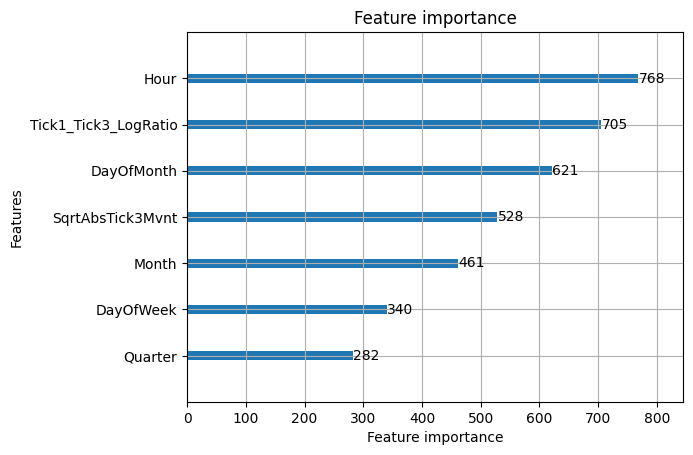

In [ ]:
# Assuming bst is your trained LightGBM model
# Plot feature importance
ax = lgb.plot_importance(clf, max_num_features=40, importance_type='split')
plt.show()

In [ ]:
! pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=8b8ed0fae6cf20447ac35616002f7feec137e9f5a6ddc8816ff00a43bb08dff9
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
import matplotlib.pyplot as plt

In [ ]:
# Assuming clf is your trained LightGBM model and X_test, y_test are your test data
# Calculate permutation importance
perm = PermutationImportance(clf, random_state=42).fit(X_validation_final, Y_validation)

In [ ]:
# Visualize the feature importances
eli5.show_weights(perm, feature_names=X_validation_final.columns.tolist(), top=40)

Weight,Feature
0.0190 ± 0.0065,SqrtAbsTick3Mvnt
0.0160 ± 0.0054,Hour
0.0102 ± 0.0039,DayOfWeek
0.0095 ± 0.0023,Month
0.0069 ± 0.0112,Quarter
0.0044 ± 0.0106,Tick1_Tick3_LogRatio
0.0008 ± 0.0052,DayOfMonth


In [ ]:
#proba & predict
y_test_pred_lg_proba = clf.predict_proba(X_validation_final)
y_test_pred_lg_class = clf.predict(X_validation_final)

In [ ]:
#performance
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_validation, y_test_pred_lg_class)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 43.97%


<Axes: >

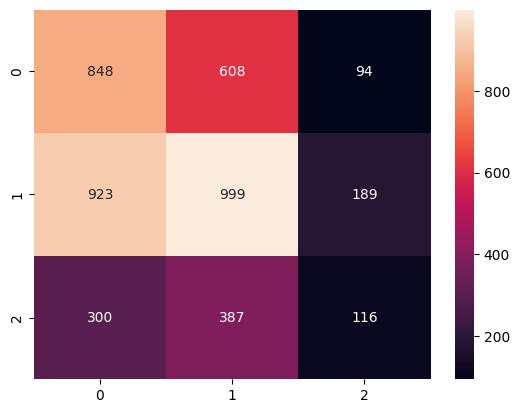

In [ ]:
from sklearn.metrics import confusion_matrix
# calculate confusion matrix
cm = confusion_matrix(Y_validation, y_test_pred_lg_class)

# plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_validation, y_test_pred_lg_class))

              precision    recall  f1-score   support

           0       0.41      0.55      0.47      1550
           1       0.50      0.47      0.49      2111
           2       0.29      0.14      0.19       803

    accuracy                           0.44      4464
   macro avg       0.40      0.39      0.38      4464
weighted avg       0.43      0.44      0.43      4464



In [ ]:
from sklearn.metrics import log_loss

# calculate log loss
logloss = log_loss(Y_validation, y_test_pred_lg_proba)
print("Logloss: %.2f" % logloss)

Logloss: 1.05


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Binarize the output labels
lb = LabelBinarizer()
lb.fit(Y_validation)

binarized_labels = lb.transform(Y_validation)
binarized_predictions = lb.transform(y_test_pred_lg_class)

# Compute and print AUC score
auc = roc_auc_score(binarized_labels, binarized_predictions, multi_class="ovr")
print("AUC: {:.2f}".format(auc))

AUC: 0.54


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

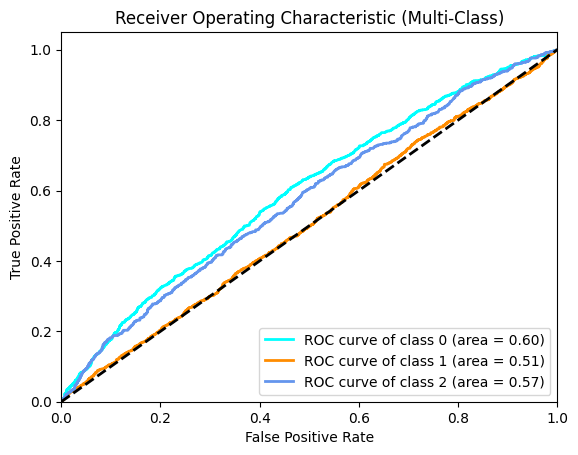

In [ ]:
# Assuming Y_validation is your test data's labels and y_test_pred_lg is the predicted probabilities

# Binarize the output
y_test = label_binarize(Y_validation, classes=[0, 1, 2])
n_classes = y_test.shape[1]

y_score = y_test_pred_lg_proba

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Multi-Class)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
result_test_lg=Y_validation.to_frame().copy()
result_test_lg=X_validation.copy()
result_test_lg["datetime"]=X_validation.datetime
result_test_lg["set_type"]='valid'

In [ ]:
# prompt: add to result_test_lg the y_test_pred_lg predictions in 4 aditional columns

result_test_lg["VS_pred"] = y_test_pred_lg_proba[:, 0]
result_test_lg["SS_pred"] = y_test_pred_lg_proba[:, 1]
result_test_lg["VW_pred"] = y_test_pred_lg_proba[:, 2]

In [ ]:
# prompt: count in result_test_lg when VS_pred>=0.6

result_test_lg[result_test_lg['VW_pred'] >= result_test_lg['VS_pred']].shape[0]


874

In [ ]:
result_test_lg.tail(5)

,AbsTick1Mvnt,AbsTick2Mvnt,AbsTick3Mvnt,Tick1_2_Interaction,Tick2_3_Interaction,Tick1_3_Interaction,Tick1_Tick2_Diff,Tick2_Tick3_Diff,Tick1_Tick3_Diff,Tick1_Tick2_Ratio,Tick2_Tick3_Ratio,Tick1_Tick3_Ratio,LogAbsTick1Mvnt,LogAbsTick2Mvnt,LogAbsTick3Mvnt,SqrTick1Mvnt,SqrTick2Mvnt,SqrTick3Mvnt,SqrtAbsTick1Mvnt,SqrtAbsTick2Mvnt,SqrtAbsTick3Mvnt,IsTick1Positive,IsTick2Positive,IsTick3Positive,IsTick1Negative,IsTick2Negative,IsTick3Negative,Tick1_Tick2_LogRatio,Tick2_Tick3_LogRatio,Tick1_Tick3_LogRatio,Hour,DayOfWeek,IsWeekend,DayOfMonth,IsEndOfMonth,Quarter,IsEndOfQuarter,Month,datetime,target,set_type,VS_pred,SS_pred,VW_pred
85221,0.0,2.0,3.0,0.0,6.0,0.0,-2.0,-1.0,-3.0,0.000000,0.666666,0.000000,-1.381551e+01,6.931477e-01,1.098613,0.0,4.0,9.0,0.000000,1.414214,1.732051,0,1,1,0,0,0,-1.993153e+01,6.309294e-01,-1.257540e+01,18,2,0,31,True,2,False,5,2023-05-31 18:41:00,0,valid,0.378717,0.371763,0.249519
85222,0.0,1.0,0.0,-0.0,-0.0,0.0,1.0,-1.0,0.0,-0.000000,-1000000.000000,0.000000,-1.381551e+01,9.999995e-07,-13.815511,0.0,1.0,0.0,0.000000,1.000000,0.000000,0,0,0,0,1,0,-6.907757e+06,-7.238238e-08,1.000000e+00,19,2,0,31,True,2,False,5,2023-05-31 19:13:00,0,valid,0.419238,0.385919,0.194843
85223,2.0,2.0,3.0,4.0,6.0,6.0,0.0,-1.0,-1.0,1.000000,0.666666,0.666666,6.931477e-01,6.931477e-01,1.098613,4.0,4.0,9.0,1.414214,1.414214,1.732051,1,1,1,0,0,0,9.999986e-01,6.309294e-01,6.309294e-01,20,2,0,31,True,2,False,5,2023-05-31 20:25:00,0,valid,0.375773,0.391306,0.232920
85224,1.0,3.0,2.0,3.0,6.0,2.0,2.0,-1.0,1.0,0.333333,1.500001,0.500000,9.999995e-07,1.098613e+00,0.693148,1.0,9.0,4.0,1.000000,1.732051,1.414214,0,0,0,1,1,1,9.102377e-07,1.584960e+00,1.442691e-06,20,2,0,31,True,2,False,5,2023-05-31 20:41:00,0,valid,0.401529,0.378427,0.220044
85225,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.999999,1000000.000000,1000000.000000,9.999995e-07,9.999995e-07,-13.815511,1.0,1.0,0.0,1.000000,1.000000,0.000000,1,1,0,0,0,0,4.999999e-01,-7.238238e-08,-7.238238e-08,23,2,0,31,True,2,False,5,2023-05-31 23:00:00,1,valid,0.353958,0.344704,0.301338


In [ ]:
#filename = 'LolaRa_lg_model_pure.sav'
#pickle.dump(clf, open(filename, 'wb'))

# Re-train (Train+Test)
1. Combine your training and test datasets.
2. Train a new model with the combined dataset using the best parameters.
3. Save or use the final model for predictions.

In [ ]:
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, TimeSeriesSplit
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# Create a TimeSeriesSplit object
tscv = TimeSeriesSplit(n_splits=5)

# Define class_weight
class_weight = {0: 5.5, 1: 4, 2: 7.5}

# Initialize a LGBMClassifier with further increased class weights for classes 1 and 2
clf = lgb.LGBMClassifier(class_weight=class_weight)

# Set up possible parameters to randomly sample from
param_test = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': sp_randint(80, 100),
    'max_depth': sp_randint(32, 84),
    'num_leaves': sp_randint(5, 31),
    'min_child_samples': sp_randint(5, 30),
    'min_child_weight': [0.001, 0.005, 0.008],
    'subsample': sp_uniform(loc=0.2, scale=0.8),
    'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
    'reg_alpha': [0],
    'reg_lambda': [0.1],
    'force_row_wise': [True]
}

# A dictionary of the metrics of interest
scoring = {'f1_macro': 'f1_macro', 'f1_micro': 'f1_micro', 'roc_auc_ovr': 'roc_auc_ovr'}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(clf, param_distributions=param_test,
                                   n_iter=50, scoring=scoring, cv=tscv, refit='roc_auc_ovr',
                                   random_state=314, verbose=True)

# Fit randomized_search. Use training data here
random_search.fit(X_train_cv_final, Y_train_cv)

# Get the best parameters from the RandomizedSearchCV and print
best_params = random_search.best_params_
print("Best parameters found: ", best_params)

# Create a new classifier using the best parameters from the RandomizedSearchCV
clf = lgb.LGBMClassifier(**best_params, class_weight=class_weight)

# Nested CV with parameter optimization (optional, since it's already done during random search)
inner_cv = TimeSeriesSplit(n_splits=8)
outer_cv = TimeSeriesSplit(n_splits=5)
nested_score = cross_val_score(clf, X=X_train_cv_final, y=Y_train_cv, cv=outer_cv)
print("Nested CV score: ", nested_score.mean())

# Combine training and validation datasets
X_combined = np.vstack((X_train_cv_final, X_validation_final))
Y_combined = np.hstack((Y_train_cv, Y_validation))

# Train a new model on the whole combined set using the best parameters found
clf.fit(X_combined, Y_combined)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Total Bins 318
[LightGBM] [Info] Number of data points in the train set: 11253, number of used features: 7
[LightGBM] [Info] Start training from score -1.121490
[LightGBM] [Info] Start training from score -1.004050
[LightGBM] [Info] Start training from score -1.178261
[LightGBM] [Info] Total Bins 335
[LightGBM] [Info] Number of data points in the train set: 22503, number of used features: 7
[LightGBM] [Info] Start training from score -1.034004
[LightGBM] [Info] Start training from score -0.989338
[LightGBM] [Info] Start training from score -1.299761
[LightGBM] [Info] Total Bins 336
[LightGBM] [Info] Number of data points in the train set: 33753, number of used features: 7
[LightGBM] [Info] Start training from score -1.046963
[LightGBM] [Info] Start training from score -0.994622
[LightGBM] [Info] Start training from score -1.276061
[LightGBM] [Info] Total Bins 330
[LightGBM] [Info] Number of data points in t

LGBMClassifier(class_weight={0: 5.5, 1: 4, 2: 7.5},
               colsample_bytree=0.48542760812934804, force_row_wise=True,
               learning_rate=0.01, max_depth=54, min_child_samples=10,
               min_child_weight=0.005, n_estimators=89, num_leaves=30,
               reg_alpha=0, reg_lambda=0.1, subsample=0.5179143553930796)

In [ ]:
# Test the trained model on a test set (if you have one)
predictions = clf.predict(conformal_dataset_[columns_to_model])
print("Test set predictions: ", predictions)

Test set predictions:  [0 1 0 ... 0 1 0]


In [ ]:
#proba & predict
y_test_pred_lg_proba_1 = clf.predict_proba(conformal_dataset_[columns_to_model])
y_test_pred_lg_class_1 =  clf.predict(conformal_dataset_[columns_to_model])

In [ ]:
#performance
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(conformal_dataset_.target, y_test_pred_lg_class_1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 45.43%


<Axes: >

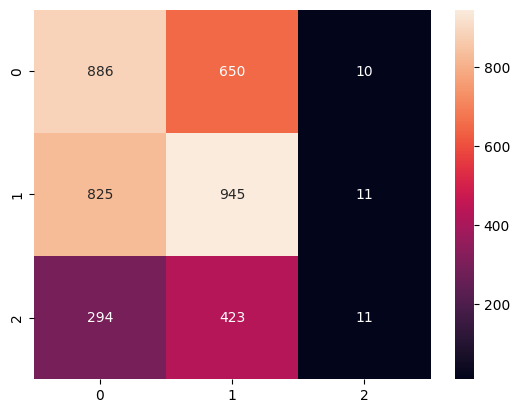

In [ ]:
from sklearn.metrics import confusion_matrix
# calculate confusion matrix
cm = confusion_matrix(conformal_dataset_.target, y_test_pred_lg_class_1)

# plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
# Binarize the output labels
lb = LabelBinarizer()
lb.fit(conformal_dataset_.target)

binarized_labels = lb.transform(conformal_dataset_.target)
binarized_predictions = lb.transform(y_test_pred_lg_class_1)

# Compute and print AUC score
auc = roc_auc_score(binarized_labels, binarized_predictions, multi_class="ovr")
print("AUC: {:.2f}".format(auc))

AUC: 0.53


In [ ]:
filename = 'LolaRa_lg_model_pure.sav'
pickle.dump(clf, open(filename, 'wb'))

 _______
|       |
|  Paw  |
|_______|
  |       |
  |  Chart  |
  |_______|